# -Importing needed Library


In [9]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

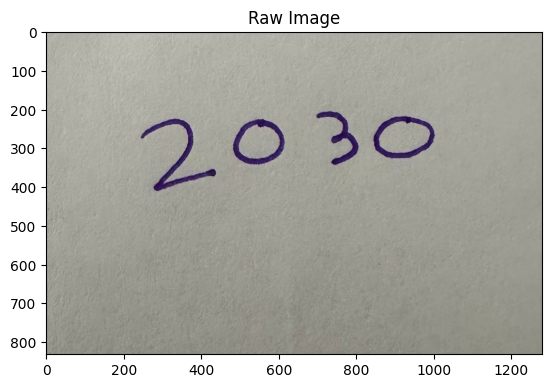

In [10]:
image = cv2.imread('C:\\Users\\owd1\\OneDrive\\Desktop\\ComputerVision-Final\\RawDataForTesting\\2030.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Raw Image")
plt.show()


# -The Goal
Our project aims to transform any image featuring a number into a format similar to that of the MNIST dataset. This involves detecting the numbers in the image and then scaling and processing them to match the dataset used for model training.

 # -MNIST dataset

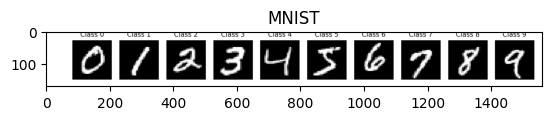

In [11]:
MNIST_Image = cv2.imread('C:\\Users\\owd1\\OneDrive\\Desktop\\ComputerVision-Final\\MNIST-Data\\MNIST.png')

plt.imshow(cv2.cvtColor(MNIST_Image, cv2.COLOR_BGR2RGB))
plt.title("MNIST")
plt.show()


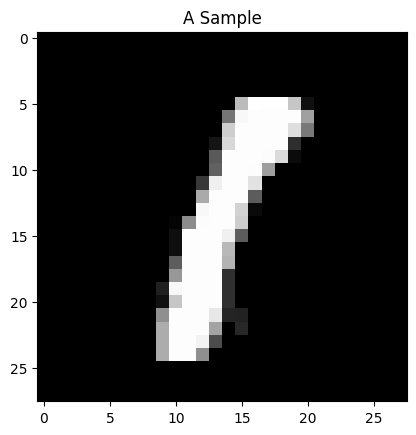

In [12]:
MNIST_Image_Sample = cv2.imread('C:\\Users\\owd1\\OneDrive\\Desktop\\ComputerVision-Final\\MNIST-Data\\sample_label_1.png')

plt.imshow(cv2.cvtColor(MNIST_Image_Sample, cv2.COLOR_BGR2RGB))
plt.title("A Sample")
plt.show()

# -Image Preprocessing with OpenCV


In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


In [14]:
edged = cv2.Canny(blurred, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sort by x-coordinate

# -Process Regions of Interest


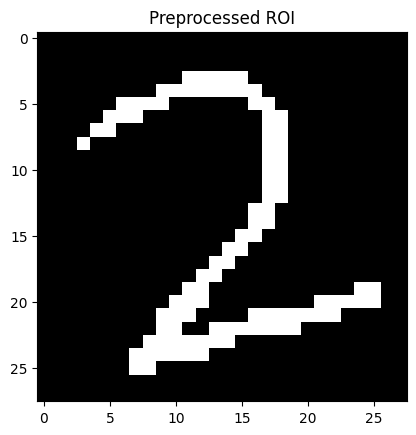

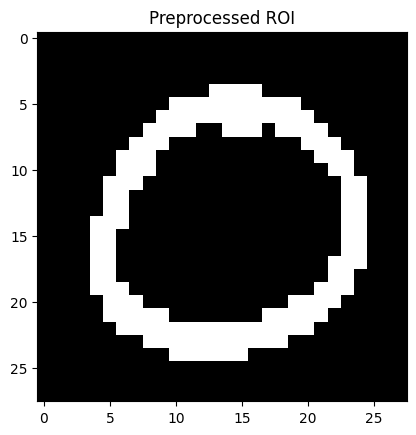

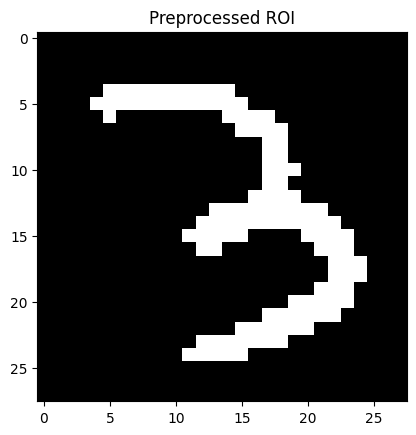

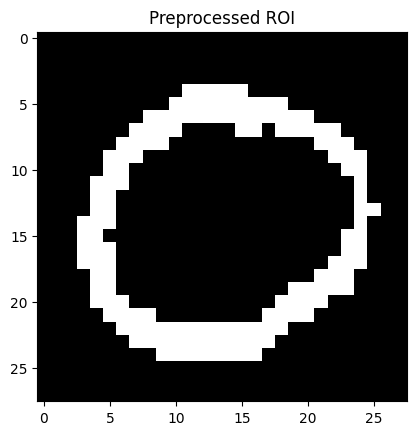

In [15]:
preprocessed_rois = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    roi = gray[y:y+h, x:x+w]

    # Preprocess ROI
    threshold_value, binary = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)
    inverted = cv2.bitwise_not(binary)
    padded = cv2.copyMakeBorder(inverted, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    resized = cv2.resize(padded, (28, 28), interpolation=cv2.INTER_NEAREST)
    roi_normalized = resized.astype('float32') / 255
    preprocessed_rois.append(roi_normalized)

    # Display each preprocessed ROI
    plt.imshow(resized, cmap='gray') 
    plt.title("Preprocessed ROI")
    plt.show()

# -Load Model and Predict Classes


In [16]:
model_path = 'C:\\Users\\owd1\\OneDrive\\Desktop\\ComputerVision-Final\\mnist_model2.h5'
model = load_model(model_path)
for preprocessed_roi in preprocessed_rois:
    roi_reshaped = preprocessed_roi.reshape(1, 28, 28, 1)  # Reshape the ROI as per model input requirements
    prediction = model.predict(roi_reshaped)
    predicted_class = np.argmax(prediction, axis=1)
    print(f"Predicted class: {predicted_class[0]}")

1/1 [==============================] - 0s 74ms/step
Predicted class: 2
1/1 [==============================] - 0s 32ms/step
Predicted class: 0
1/1 [==============================] - 0s 24ms/step
Predicted class: 3
1/1 [==============================] - 0s 32ms/step
Predicted class: 0
